In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [3]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Classroom/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set', 
                                          class_mode='categorical',batch_size=24)

Found 10410 images belonging to 9 classes.


In [7]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/Classroom/Dataset Plant Disease/fruit-dataset/fruit-dataset/train', class_mode='categorical',batch_size=24)

Found 56 images belonging to 6 classes.


In [8]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [9]:
model=Sequential()

In [10]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
model.add(Flatten())

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(Dense(300,activation='relu')) 
model.add(Dense(150,activation='relu'))

In [15]:
model.add(Dense(9,activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
len(x_train)

434

In [18]:
1238/24

51.583333333333336

In [20]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10


InvalidArgumentError: ignored

In [21]:
model.save('vegetabledata.h5')

In [22]:
import numpy as np 
from tensorflow.keras.models import load_model 
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('vegetabledata.h5')

In [25]:
img=image.load_img('/content/drive/MyDrive/Classroom/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Pepper,_bell___healthy/00208a93-7687-4e8c-b79e-3138687e0f38___JR_HL 7955.JPG')

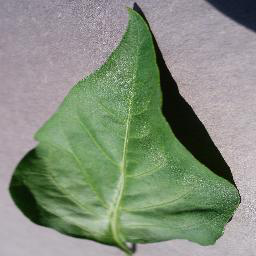

In [26]:
img

In [27]:
x=image.img_to_array(img)

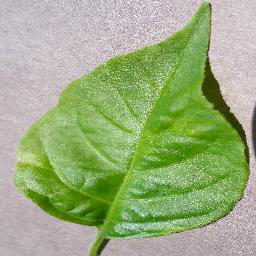

In [29]:
img=image.load_img('/content/drive/MyDrive/Classroom/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Pepper,_bell___healthy/01468dda-44f3-4de8-8aed-948bcc29b719___JR_HL 8704.JPG')
img

In [30]:
x=image.img_to_array(img)

In [31]:
x

array([[[197., 190., 198.],
        [195., 188., 196.],
        [193., 186., 194.],
        ...,
        [208., 197., 203.],
        [211., 200., 206.],
        [212., 201., 207.]],

       [[195., 188., 196.],
        [191., 184., 192.],
        [187., 180., 188.],
        ...,
        [208., 197., 203.],
        [208., 197., 203.],
        [208., 197., 203.]],

       [[199., 192., 200.],
        [195., 188., 196.],
        [190., 183., 191.],
        ...,
        [212., 201., 207.],
        [209., 198., 204.],
        [209., 198., 204.]],

       ...,

       [[183., 172., 178.],
        [184., 173., 179.],
        [186., 175., 181.],
        ...,
        [139., 124., 129.],
        [202., 187., 192.],
        [146., 131., 136.]],

       [[182., 171., 177.],
        [183., 172., 178.],
        [184., 173., 179.],
        ...,
        [145., 130., 135.],
        [167., 152., 157.],
        [187., 172., 177.]],

       [[191., 180., 186.],
        [191., 180., 186.],
        [191., 1

In [32]:
x=np.expand_dims(x,axis=0)

In [33]:
x

array([[[[197., 190., 198.],
         [195., 188., 196.],
         [193., 186., 194.],
         ...,
         [208., 197., 203.],
         [211., 200., 206.],
         [212., 201., 207.]],

        [[195., 188., 196.],
         [191., 184., 192.],
         [187., 180., 188.],
         ...,
         [208., 197., 203.],
         [208., 197., 203.],
         [208., 197., 203.]],

        [[199., 192., 200.],
         [195., 188., 196.],
         [190., 183., 191.],
         ...,
         [212., 201., 207.],
         [209., 198., 204.],
         [209., 198., 204.]],

        ...,

        [[183., 172., 178.],
         [184., 173., 179.],
         [186., 175., 181.],
         ...,
         [139., 124., 129.],
         [202., 187., 192.],
         [146., 131., 136.]],

        [[182., 171., 177.],
         [183., 172., 178.],
         [184., 173., 179.],
         ...,
         [145., 130., 135.],
         [167., 152., 157.],
         [187., 172., 177.]],

        [[191., 180., 186.],
       

In [41]:
y=np.expand_dims(x,axis=0)

In [35]:
y=np.argmax(model.predict(x),axis = 1)

ValueError: ignored

In [36]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [37]:
index=['Pepper,bell_Bacterial_spot','Pepper,_bell_healthy','Potato_Early_blight','Potato__Late_blight']

In [42]:
index[y[0]]

TypeError: ignored

In [40]:
img=image.load_img('/content/drive/MyDrive/Classroom/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Pepper,_bell___healthy/0119205b-cfac-4322-be37-dcc401fcfa11___JR_HL 8527.JPG') 
x=image.img_to_array(img) 
x=np.expand_dims(x,axis=0) 
y=np.argmax(model.predict(x),axis=1) 
index=['Pepper,_bell_Bacterial_spot','Pepper,_bell_healthy','Potato_Early_blight','Potato_Late_blight','Potato_healthy','Tomato_Bacterial_spot','Tomato_Leaf_Mold','Tomato__Septoria_leaf_spot'] 
index[y[0]]

ValueError: ignored